In [1]:
import json

import matplotlib.pyplot as plt

from main.compute_depth import compute_depth

%load_ext autoreload
%autoreload 2


In [8]:
ANNOT_PATH = "/mnt/folcon/01_ovary_cuts/roi_annotation_united/all_annotations_with_depth.json"
PRED_PATH = "/mnt/folcon/04_model_predictions/efficientdet/results.json"
IMG_PATH = "/mnt/folcon/01_ovary_cuts/ovaries_images"
with open(PRED_PATH, "r") as file:
    predictions = json.load(file)
with open(ANNOT_PATH, "r") as file:
    annotations = json.load(file)

In [9]:
depths_gt = {
    "PMF": [],
    "Primary": [],
    "Secondary": [],
}
depths_pred = {
    "PMF": [],
    "Primary": [],
    "Secondary": [],
}



In [10]:
for sld_name in annotations:
    for roi in annotations[sld_name].values():
        for i in range(len(roi["depths"])):
            depths_gt[roi["classes"][i]].append(roi["depths"][i])
for sld_name in predictions:
    for roi in predictions[sld_name].values():
        for i in range(len(roi["depths"])):
            depths_pred[roi["classes"][i]].append(roi["depths"][i])  

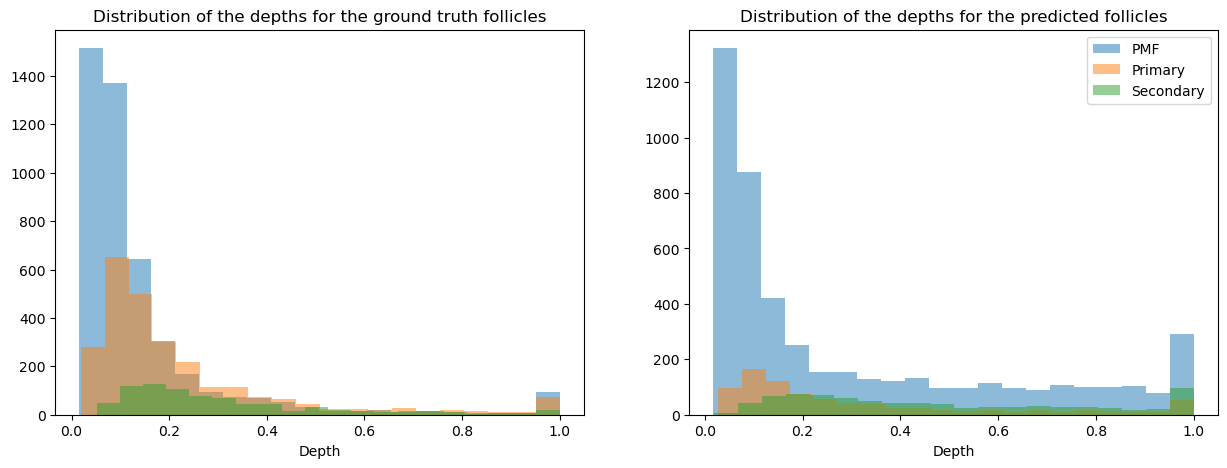

In [18]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))
NBINS = 20
ax[0].hist(depths_gt["PMF"], bins=NBINS, alpha=0.5, label="PMF")
ax[0].hist(depths_gt["Primary"], bins=NBINS, alpha=0.5, label="Primary")
ax[0].hist(depths_gt["Secondary"], bins=NBINS, alpha=0.5, label="Secondary")
ax[1].hist(depths_pred["PMF"], bins=NBINS, alpha=0.5, label="PMF")
ax[1].hist(depths_pred["Primary"], bins=NBINS, alpha=0.5, label="Primary")
ax[1].hist(depths_pred["Secondary"], bins=NBINS, alpha=0.5, label="Secondary")
ax[0].set_title("Distribution of the depths for the ground truth follicles")
ax[1].set_title("Distribution of the depths for the predicted follicles")
ax[0].set_xlabel("Depth")
ax[1].set_xlabel("Depth")
plt.legend(loc='upper right')
plt.legend(loc='upper right')
plt.savefig("depths_distributions.pdf", format="pdf", bbox_inches="tight")
plt.show()


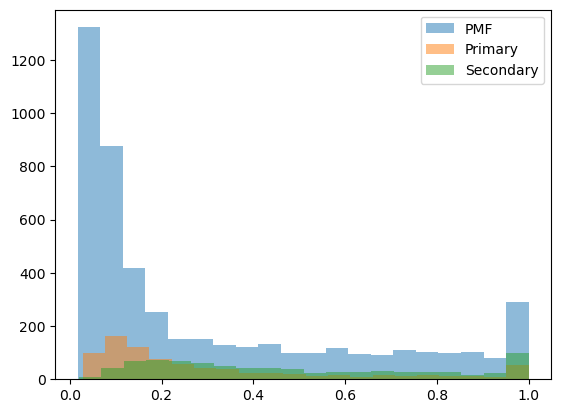

In [36]:

plt.show()